In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv")

In [37]:
pima.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X = pima[feature_cols] 
y = pima['Outcome'] 

In [39]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [40]:

from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,   0],
       [  0,  67]])

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

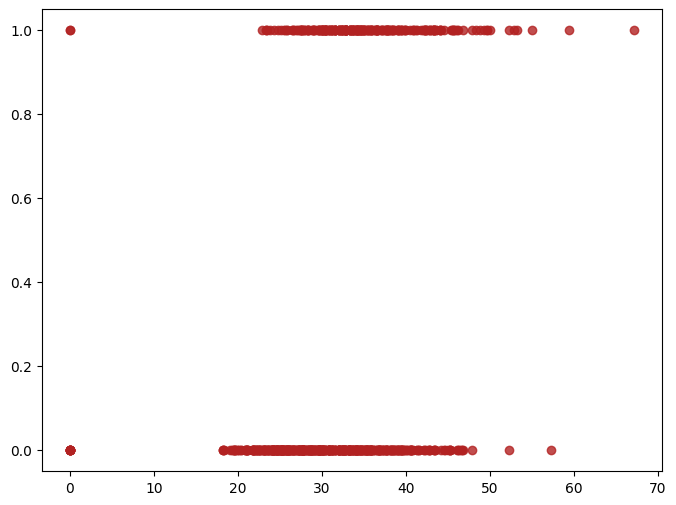

In [42]:


X = df['BMI']
y = df['Outcome']

plt.figure(figsize=(8,6))
sns.regplot(
    x=X,
    y=y,
    logistic=True,   
    ci=None,           
    color='firebrick',
      
)

plt.title('Logistic Regression')
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')
plt.box(False)
plt.show()




In [ ]:
# 1. Imports
import pandas as pd
import numpy as np


In [ ]:
# 2. sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# 3. Import confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
# 4. Load dataset
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 5. Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [ ]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 7. Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [ ]:
# 8. Predictions
y_pred = model.predict(X_test)


In [ ]:
# 9. Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[78, 21],
       [18, 37]])

In [ ]:
# 10. Plot imports
import matplotlib.pyplot as plt
import seaborn as sns


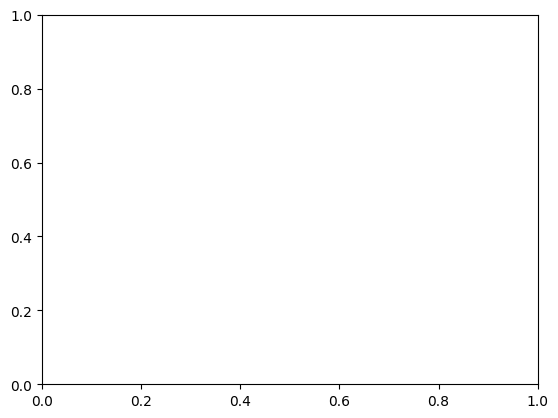

In [ ]:
# 11. Class names and figure
class_names = [0, 1]
fig, ax = plt.subplots()


([<matplotlib.axis.XTick at 0x1ad963c69d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

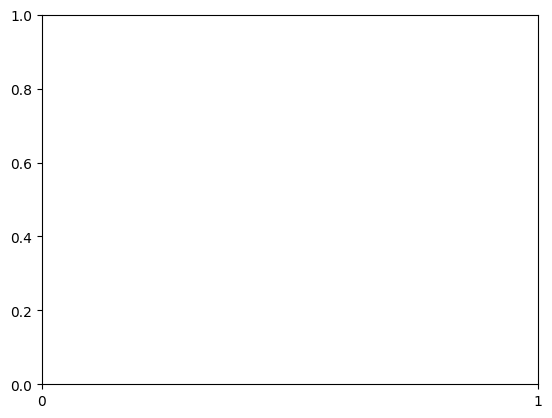

In [ ]:
# 12. Tick marks
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)


<Axes: >

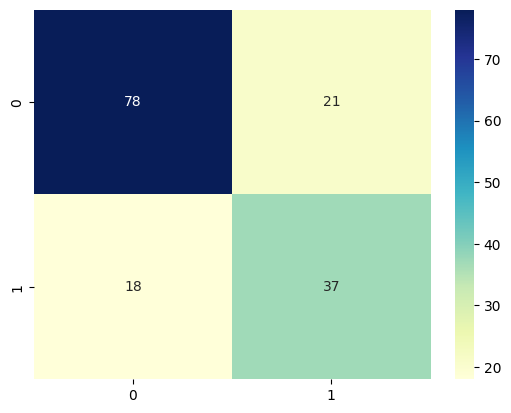

In [ ]:
# 13. Y ticks + heatmap
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')


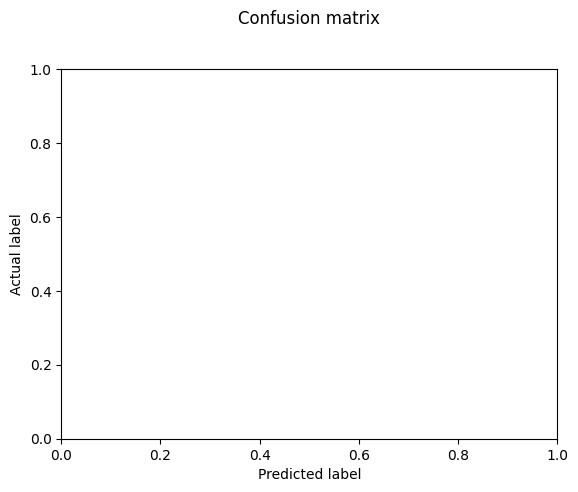

In [ ]:
# 14. Labels and title
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# 15. Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# 16. Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7467532467532467

In [ ]:
# 17. Precision
precision = precision_score(y_test, y_pred)
precision


0.6379310344827587

In [ ]:
# 18. Recall
recall = recall_score(y_test, y_pred)
recall


0.6727272727272727

In [ ]:
# 19. F1 Score
f1 = f1_score(y_test, y_pred)
f1


0.6548672566371682

In [ ]:
# Convert to percentage with 2 decimals
print(f"Recall: {recall*100:.2f}%")


Recall: 67.27%
